In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
def p(x):
  return x**2
x_train = np.arange(-1,1.01,0.2) 
x_validation = x_train
y_train = np.empty(0)
y_validation = y_train
ep = 0.1
for a in x_train:
  y_train = np.append(y_train, p(a) + ep)
  y_validation = np.append(y_validation, p(a) - ep)
  ep = -ep

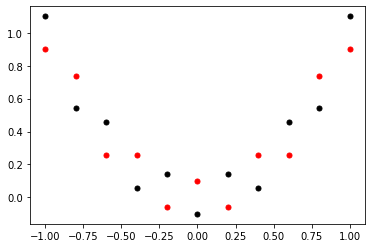

In [55]:
plt.plot(x_train,y_train,'ko',markersize=5)  
plt.plot(x_validation,y_validation,'ro',markersize=5)  

In [56]:
def powers_of_features(x,k):
  X = x.reshape(len(x),1)
  for i in range(1,k):
    X = np.column_stack((X, x*X[:,-1]))
  return X

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def add_one_end_rows(X):
  return np.column_stack((X, np.ones(X.shape[0])))

def best_lin(X,y):
  C = add_one_end_rows(X)
  A = np.matmul(C.T,C)
  r = np.dot(C.T,y)
  z = np.linalg.solve(A,r)
  w = z[:-1]
  b = z[-1]
  return w, b  

def best_polynomial(x,y,d):
  X = powers_of_features(x,d)
  X_scaled, X_mean, X_std = scale(X)
  y_scaled, y_mean, y_std = scale(y)
  w, b = best_lin(X_scaled,y_scaled)
  return w, b, X_mean, X_std, y_mean, y_std

def scaled_predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std):
  x_scaled = (x-X_train_mean)/X_train_std
  y_hat_scaled = np.matmul(x_scaled,w) + b
  return y_hat_scaled  
  
def predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std):
  y_hat_scaled = scaled_predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std)
  y_hat = y_train_std*y_hat_scaled + y_train_mean
  return y_hat
  
def predictions_polynomial(x, w, b, X_mean, X_std, y_mean, y_std):
  X = powers_of_features(x,len(w))
  return predictions(X, w, b, X_mean, X_std, y_mean, y_std)  

Input: y, the labels, and y_hat, the predictions.
Output: mean square error

In [57]:
def mean_square_error(y,y_hat,y_mean,y_std):
  y_scaled = (y-y_mean)/y_std
  y_hat_scaled = (y_hat-y_mean)/y_std
  return np.sum((y_scaled - y_hat_scaled)**2)/len(y)

In [58]:
J = np.empty(0)
for d in range(1,11):
  w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d)
  y_hat_validation = predictions_polynomial(x_validation, w, b, X_mean, X_std, y_mean, y_std)
  J = np.append(J,mean_square_error(y_validation,y_hat_validation,y_mean,y_std))

#z = np.arange(-1,1.001,0.01) 
#y_hat_z = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
#plt.plot(x_train,y_train,'ko',markersize=5)  
#plt.plot(x_test,y_test,'ro',markersize=5)   
#plt.plot(z,y_hat_z,'b') 

[0.80731751 0.07717522 0.07717522 0.09353023 0.09353023 0.12021135
 0.12021135 0.1642838  0.1642838  0.2679837 ]


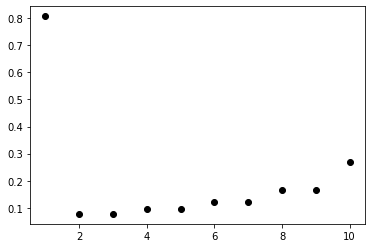

In [62]:
print(J)
plt.plot(np.arange(1,11),J,'ko')

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
df = pd.read_csv('/content/drive/MyDrive/Data/to fit poly.csv')

In [65]:
x = df['features'].values
y = df['labels'].values

In [66]:
def shuffle_examples(X,y):
  p = np.random.permutation(len(X))
  return X[p],y[p]

def split_train_test(X,y,prop_train):
  n = int(prop_train*len(X))
  return X[:n],y[:n],X[n:],y[n:]

In [67]:
x, y = shuffle_examples(x,y)

In [68]:
x_train, y_train, x_validation, y_validation = split_train_test(x,y,0.8)

In [69]:
J = np.empty(0)
for d in range(1,21):
  w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,d)
  y_hat_validation = predictions_polynomial(x_validation, w, b, X_mean, X_std, y_mean, y_std)
  J = np.append(J,mean_square_error(y_validation,y_hat_validation,y_mean,y_std))

[0.65282707 0.60676558 0.28711288 0.31109584 0.34494131 0.34562454
 0.35223738 0.35234476 0.39591287 0.41030979 0.39945463 0.40479372
 0.43673654 0.54454649 0.54530563 0.55660605 0.55482376 0.62329557
 0.64133915 0.57888786]


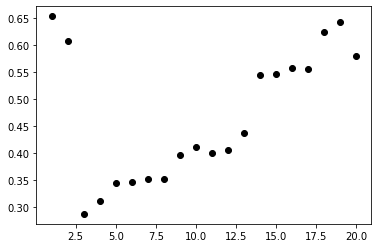

In [71]:
print(J)
plt.plot(np.arange(1,21),J,'ko')

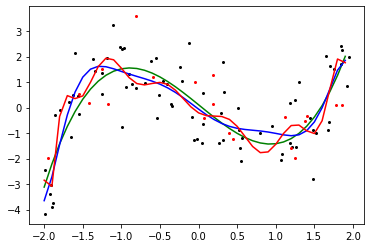

In [75]:
z = np.arange(-2,2,0.1)

plt.plot(x_train,y_train,'ko',markersize=2)
plt.plot(x_validation,y_validation,'ro',markersize=2)

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,3)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'g')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,9)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'b')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x_train,y_train,14)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'r')

